In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import math

In [2]:
file_name = 'D:\Data\Energinet.dk\Production_and_Consumption\Production_Consumption_DK1.csv'
reader = pd.read_csv(file_name, sep=', ')
reader.dtypes

C:\Users\kacha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Year                int64
Month               int64
Date                int64
Hr                  int64
GrossCon_MWhph    float64
NetCon_MWhph      float64
CHP_MWhph         float64
dtype: object

In [4]:
reader.CHP_MWhph

0        208.00
1        207.20
2        206.10
3        207.50
4        232.20
5        226.00
6        239.40
7        309.40
8        309.90
9        275.50
10       340.90
11       344.60
12       342.50
13       344.50
14       343.70
15       347.70
16       355.90
17       357.40
18       354.80
19       305.10
20       281.30
21       274.60
22       275.00
23       251.60
24       249.00
25       249.30
26       219.80
27       245.20
28       269.80
29       379.60
          ...  
43794    410.57
43795    368.85
43796    356.53
43797    345.47
43798    348.24
43799    341.90
43800    331.34
43801    332.14
43802    346.50
43803    368.26
43804    370.76
43805    380.23
43806    412.14
43807    378.46
43808    371.61
43809    348.43
43810    345.97
43811    356.27
43812    357.05
43813    343.52
43814    339.52
43815    359.90
43816    353.43
43817    351.55
43818    326.12
43819    290.47
43820    285.12
43821    282.98
43822    272.43
43823    287.85
Name: CHP_MWhph, Length:

In [5]:
reader.describe()

,Year,Month,Date,Hr,GrossCon_MWhph,NetCon_MWhph,CHP_MWhph
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2015.000548,6.523549,15.727820,11.500000,2320.401853,2249.357202,341.134537
std,1.414036,3.448572,8.799425,6.922266,475.409059,473.406999,154.746570
min,2013.000000,1.000000,1.000000,0.000000,1330.700000,1281.200000,137.700000
25%,2014.000000,4.000000,8.000000,5.750000,1926.600000,1855.200000,231.607500
50%,2015.000000,7.000000,16.000000,11.500000,2276.950000,2202.900000,290.900000
75%,2016.000000,10.000000,23.000000,17.250000,2710.112500,2638.805000,401.725000
max,2017.000000,12.000000,31.000000,23.000000,3672.200000,3615.900000,1144.100000


In [6]:
reader.NetCon_MWhph[43823]
t = np.arange(0, len(reader.Year))
t = t+1

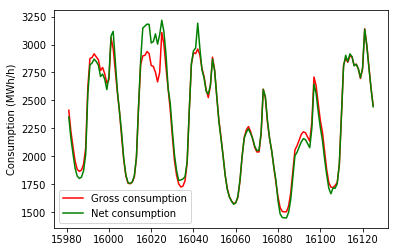

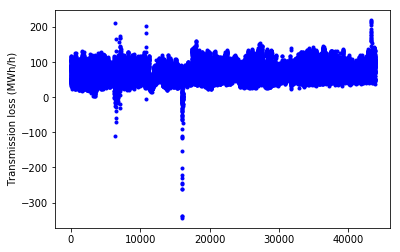

In [12]:
plt.figure(1)

a=15980
b=16125
plt.plot(t[a:b], reader.GrossCon_MWhph[a:b], 'r-', label='Gross consumption')
plt.plot(t[a:b], reader.NetCon_MWhph[a:b], 'g-', label='Net consumption')

#plt.plot(t, reader.GrossCon_MWhph, 'r-', label='Gross consumption')
#plt.plot(t, reader.NetCon_MWhph, 'g-', label='Net consumption')
plt.legend()
plt.ylabel('Consumption (MWh/h)')

plt.show()

diff_Con = reader.GrossCon_MWhph - reader.NetCon_MWhph

plt.figure(2)
#plt.plot(t[a:b], diff_Con[a:b], 'b.')
plt.plot(t, diff_Con, 'b.')
plt.ylabel('Transmission loss (MWh/h)')
plt.show()

The following section will focus on the analysis of the entire time series

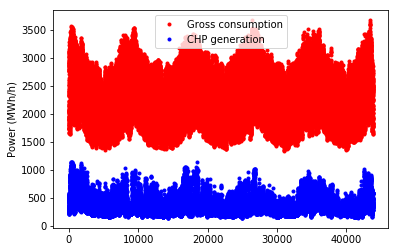

In [13]:
# Begin with simple statistics

plt.figure(3)
plt.plot(reader.GrossCon_MWhph, 'r.', label='Gross consumption')
plt.plot(reader.CHP_MWhph, 'b.', label='CHP generation')
plt.legend()
plt.ylabel('Power (MWh/h)')
plt.show()

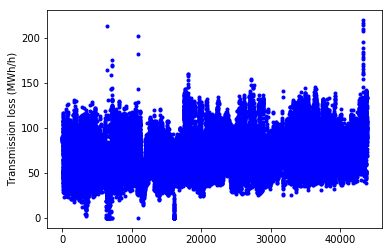

In [93]:
#subset = np.where(diff_Con < 0)
#np.arange(len(reader.NetCon_MWhph))

for i in np.arange(len(reader.NetCon_MWhph)):
    if (reader.GrossCon_MWhph[i] < reader.NetCon_MWhph[i]):
        reader.GrossCon_MWhph[i] =  reader.NetCon_MWhph[i]
        
mod_diff_Con = reader.GrossCon_MWhph - reader.NetCon_MWhph

plt.figure(3)
plt.plot(t, mod_diff_Con, 'b.')
plt.ylabel('Transmission loss (MWh/h)')
plt.show()

# Select annual data

#annual_gross = pd.DataFrame({'2013':[np.arange(0, len(reader.Year))],'2014':[np.arange(0, len(reader.Year))]})

all_years = [2013, 2014, 2015, 2016, 2017]
nr_hr = np.zeros(len(all_years), dtype=int)

for y in np.arange(0,len(all_years)):
    year = all_years[y]
    print(year)
    
    count = 0
    for n in np.arange(0, len(reader.Year)):
        if (reader.Year[n] == year):
            count += 1
            
    nr_hr[y] = count
    
print(nr_hr)
    
    #if (year==2016):
        #nr_vals = 366*24
    #else:
        #nr_vals = 365*24        
        
    #annual_gross = pd.DataFrame()
    #my_df = pd.DataFrame(data=[4,5,6,7], index=range(0,4), columns=['A'])
    #for i in np.arange(0, nr_vals):
        

#for i in np.arange(len(reader.Year)):
#    if (reader.Year[i] == year):
        
        #print(count)
        #print(i)
        #print(reader.GrossCon_MWhph[i])
       
      #  annual_gross.loc[count, year]  = reader.GrossCon_MWhph[i]

       # count += 1
        
    #print(len(annual_gross))

2013
2014
2015
2016
2017
[8760 8760 8760 8784 8760]


In [83]:
np.arange(0, len(reader.Year))

array([    0,     1,     2, ..., 43821, 43822, 43823])

2013
2295.1613584474776 2229.7041894977165 396.10309360730616


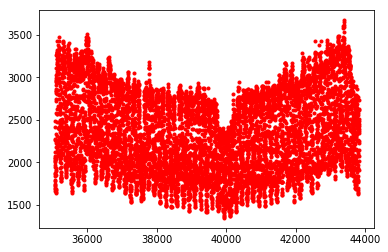

2014
2297.2091438356033 2231.1649771689476 323.0572602739721


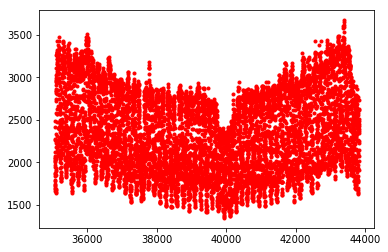

2015
2317.940285388135 2245.9014840182685 297.33985159817377


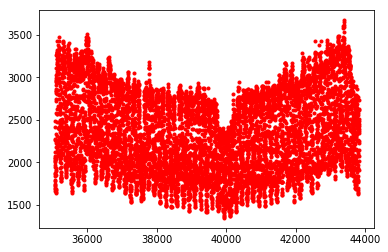

2016
2337.525097905278 2264.0163285519184 339.1229428506381


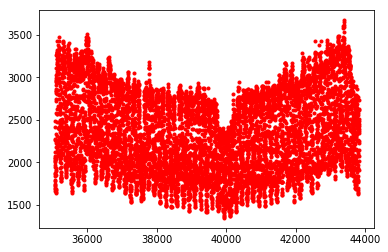

2017
2354.1264680365307 2275.407165525109 350.0550468036536


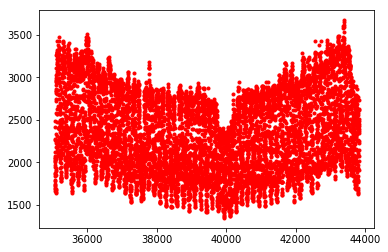

In [106]:
all_years = [2013, 2014, 2015, 2016, 2017]

annual_yr = []
annual_mn = []
annual_dt = []
annual_hr = []
annual_grosscon = []
annual_netcon = []
annual_chp = []
d = {}

for y in np.arange(0,len(all_years)):
    year = all_years[y]
    print(year)
    
    annual_yr = reader.Year[reader.Year == year]
    annual_mn = reader.Month[reader.Year == year]
    annual_dt = reader.Date[reader.Year == year]
    annual_hr = reader.Hr[reader.Year == year]
    annual_grosscon = reader.GrossCon_MWhph[reader.Year == year]
    annual_netcon = reader.NetCon_MWhph[reader.Year == year]
    annual_chp = reader.CHP_MWhph[reader.Year == year]
    
    annual_matrix = np.column_stack((annual_yr, annual_mn, annual_dt, annual_hr, annual_grosscon, annual_netcon, annual_chp))
    
    d["group" + str(year)] = annual_matrix
    
    print(np.mean(annual_grosscon), np.mean(annual_netcon), np.mean(annual_chp))
    
    plt.plot(annual_con, 'r.')
    plt.show()

In [107]:
d

{'group2013': array([[2.0130e+03, 1.0000e+00, 1.0000e+00, ..., 1.9536e+03, 1.8692e+03,
         2.0800e+02],
        [2.0130e+03, 1.0000e+00, 1.0000e+00, ..., 1.8045e+03, 1.7182e+03,
         2.0720e+02],
        [2.0130e+03, 1.0000e+00, 1.0000e+00, ..., 1.7238e+03, 1.6369e+03,
         2.0610e+02],
        ...,
        [2.0130e+03, 1.2000e+01, 3.1000e+01, ..., 1.9981e+03, 1.9093e+03,
         2.6050e+02],
        [2.0130e+03, 1.2000e+01, 3.1000e+01, ..., 1.9261e+03, 1.8312e+03,
         2.5690e+02],
        [2.0130e+03, 1.2000e+01, 3.1000e+01, ..., 1.9122e+03, 1.8255e+03,
         2.5300e+02]]),
 'group2014': array([[2.0140e+03, 1.0000e+00, 1.0000e+00, ..., 1.8248e+03, 1.7332e+03,
         2.3310e+02],
        [2.0140e+03, 1.0000e+00, 1.0000e+00, ..., 1.7507e+03, 1.6620e+03,
         2.3560e+02],
        [2.0140e+03, 1.0000e+00, 1.0000e+00, ..., 1.6766e+03, 1.5852e+03,
         2.3460e+02],
        ...,
        [2.0140e+03, 1.2000e+01, 3.1000e+01, ..., 1.9431e+03, 1.8863e+03,
        

In [109]:
print(d['group2016'][0])

[2.0160e+03 1.0000e+00 1.0000e+00 0.0000e+00 1.8136e+03 1.7491e+03
 2.5560e+02]


In [103]:
years = [2013, 2014, 2015, 2016, 2017]
annual_vals = []

for y in np.arange(0, len(years)):
        
    nr_rows = len(reader.NetCon_MWhph[reader.Year == years[y]])
    
    annual_vals.append([])
    
    for row in np.arange(0, nr_rows):
        annual_vals[y].append(reader.NetCon_MWhph[reader.Year == years[y]])
        
        
print(len(annual_vals[0]))
print(len(annual_vals[1]))
print(len(annual_vals[2]))
print(len(annual_vals[3]))
print(len(annual_vals[4]))

8760
8760
8760
8784
8760


array([[0., 1.],
       [1., 2.],
       [2., 3.]])

8760
8760
8760
8784
8760
